<a href="https://colab.research.google.com/github/DonaldReddy/Machine-Learning/blob/main/crab_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# competition_name = "playground-series-s3e16"
# dataset_name=""

# # Mount your Google Drive.
# from google.colab import drive
# drive.mount("/content/drive/")

# kaggle_creds_path = "/content/drive/MyDrive/kaggle/kaggle.json"

# ! pip install kaggle --quiet

# ! mkdir ~/.kaggle
# ! cp {kaggle_creds_path} ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

# ! mkdir kaggle_data

# if competition_name:
#   ! kaggle competitions download -c {competition_name}
#   ! unzip {competition_name+".zip"} -d kaggle_data
#   ! rm {competition_name+".zip"}
# elif dataset_name:
#   ! kaggle datasets download -d {dataset_name}
#   ! unzip {dataset_name.split("/")[1] + ".zip"} -d kaggle_data
#   ! rm {dataset_name.split("/")[1] + ".zip"}

# # Unmount your Google Drive
# drive.flush_and_unmount()

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [4]:
df=pd.read_csv("/content/kaggle_data/train.csv")

In [5]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [7]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [8]:
df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [9]:
# df['Sex']=df['Sex'].map({'M':2,'F':1,"I":0})
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [10]:
df.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1,0
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1,0
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,1
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,0,0
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
 9   Sex_I           74051 non-null  uint8  
 10  Sex_M           74051 non-null  uint8  
dtypes: float64(7), int64(2), uint8(2)
memory usage: 5.2 MB


In [12]:
df.drop(['id'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          74051 non-null  float64
 1   Diameter        74051 non-null  float64
 2   Height          74051 non-null  float64
 3   Weight          74051 non-null  float64
 4   Shucked Weight  74051 non-null  float64
 5   Viscera Weight  74051 non-null  float64
 6   Shell Weight    74051 non-null  float64
 7   Age             74051 non-null  int64  
 8   Sex_I           74051 non-null  uint8  
 9   Sex_M           74051 non-null  uint8  
dtypes: float64(7), int64(1), uint8(2)
memory usage: 4.7 MB


In [14]:
corr=df.corr()

<Axes: >

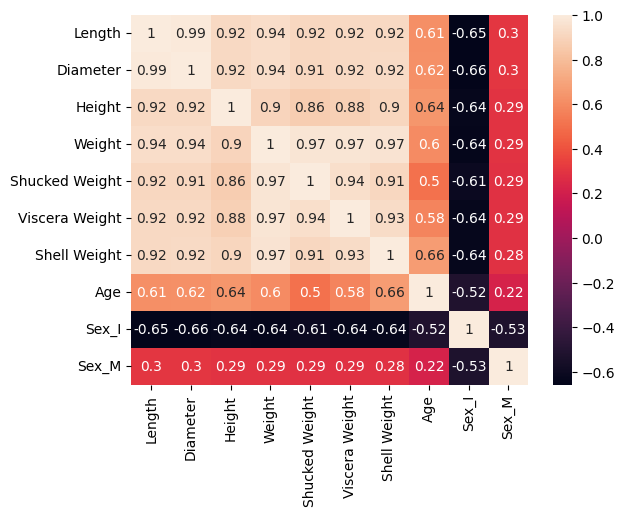

In [15]:
sb.heatmap(corr,annot=True,)

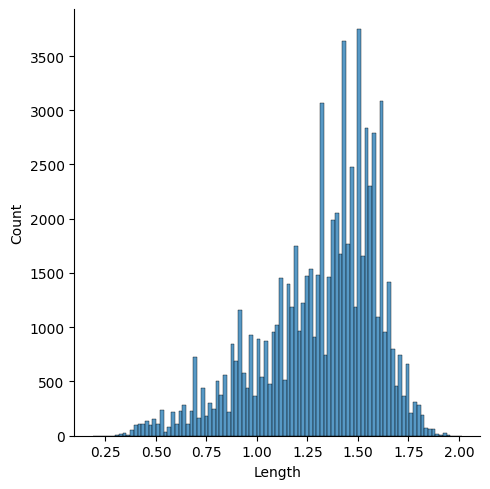

In [16]:
sb.displot(data=df,x='Length')

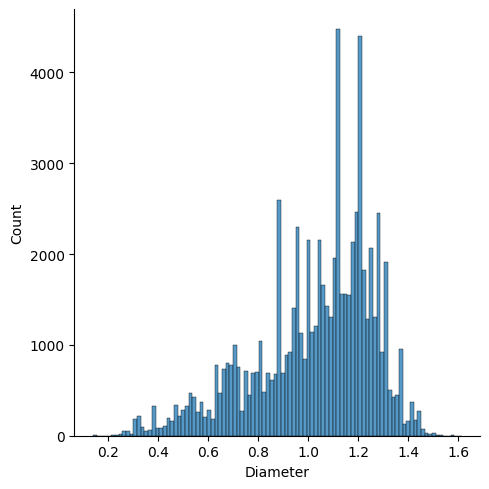

In [17]:
sb.displot(data=df,x='Diameter')

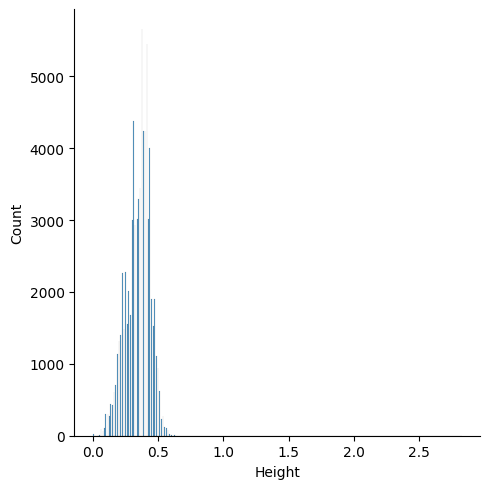

In [18]:
sb.displot(data=df,x='Height')

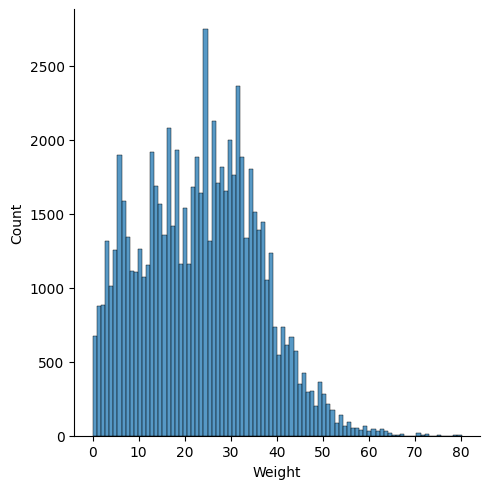

In [19]:
sb.displot(data=df,x='Weight')

In [20]:
X=df.drop(['Age'],axis=1)
y=df['Age']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
X.shape,X_train.shape

((74051, 9), (51835, 9))

In [23]:
# scaler=StandardScaler()
scaler=MinMaxScaler()

scaler.fit(X_train,y_train)

scaled_X_train=scaler.transform(X_train)
scaled_X_val=scaler.transform(X_val)



In [24]:
model=LinearRegression()

model.fit(scaled_X_train,y_train)

LinearRegression()

In [25]:
preds=model.predict(scaled_X_val)

In [26]:
mean_absolute_error(y_val,preds)

1.4852264418286676

In [27]:
mean_squared_error(y_val,preds)

4.550013312523304

In [28]:
np.sqrt(mean_squared_error(y_val,preds))

2.133076021271465

In [29]:
model.coef_

array([  1.35916838,   3.32449096,  20.7090324 ,  16.19964279,
       -26.30554119,  -4.06697749,  13.70652952,  -1.02482678,
        -0.09513747])

In [30]:
ridge_model=Ridge()

In [31]:
ridge_model.fit(scaled_X_train,y_train)

Ridge()

In [32]:
ridge_preds=ridge_model.predict(scaled_X_val)

In [33]:
mean_absolute_error(y_val,ridge_preds)

1.4847107224540388

In [34]:
sgd_model=SGDRegressor()
sgd_model.fit(scaled_X_train,y_train)
sgd_preds=sgd_model.predict(scaled_X_val)
mean_absolute_error(y_val,sgd_preds)

1.5022459803191988

In [36]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *

In [38]:
X_train.shape

(51835, 9)

In [66]:
test_df=pd.read_csv("/content/kaggle_data/test.csv")
test_df.drop(['id'],axis=1,inplace=True)
test_df=pd.get_dummies(test_df,columns=['Sex'],drop_first=True)
X_test=test_df
# y_test=test_df['Age']
scaled_X_test=scaler.transform(X_test)


In [67]:
inputs=Input(shape=(9))

x=Dense(32,activation='relu')(inputs)
x=Dense(64,activation='relu')(x)
# x=Dense(128,activation='relu')(x)

output=Dense(1,activation='relu')(x)

model=Model(inputs=inputs,outputs=output)

In [68]:
model.compile(optimizer='Adam',loss='mae',metrics=['mae'])

In [69]:
hist=model.fit(x=scaled_X_train,
          y=y_train,
          epochs=10,
               validation_data=(scaled_X_val,y_val)
          )

Epoch 1/10
1620/1620 [==============================] - 11s 6ms/step - loss: 1.8503 - mae: 1.8503 - val_loss: 1.5291 - val_mae: 1.5291
Epoch 2/10
1620/1620 [==============================] - 11s 7ms/step - loss: 1.4889 - mae: 1.4889 - val_loss: 1.4847 - val_mae: 1.4847
Epoch 3/10
1620/1620 [==============================] - 11s 7ms/step - loss: 1.4489 - mae: 1.4489 - val_loss: 1.4320 - val_mae: 1.4320
Epoch 4/10
1620/1620 [==============================] - 12s 7ms/step - loss: 1.4390 - mae: 1.4390 - val_loss: 1.4253 - val_mae: 1.4253
Epoch 5/10
1620/1620 [==============================] - 10s 6ms/step - loss: 1.4336 - mae: 1.4336 - val_loss: 1.4321 - val_mae: 1.4321
Epoch 6/10
1620/1620 [==============================] - 6s 4ms/step - loss: 1.4280 - mae: 1.4280 - val_loss: 1.4256 - val_mae: 1.4256
Epoch 7/10
1620/1620 [==============================] - 7s 4ms/step - loss: 1.4247 - mae: 1.4247 - val_loss: 1.4075 - val_mae: 1.4075
Epoch 8/10
1620/1620 [==============================] - 6

<Axes: >

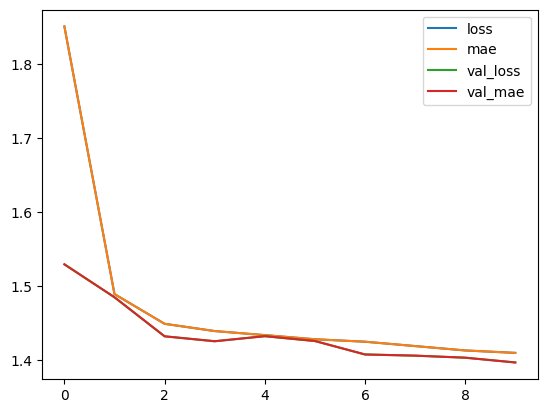

In [70]:
pd.DataFrame(hist.history).plot()

In [71]:
model.evaluate(scaled_X_val,y_val)

695/695 [==============================] - 2s 3ms/step - loss: 1.3966 - mae: 1.3966


[1.39663827419281, 1.39663827419281]

In [88]:
test_df=pd.read_csv("/content/kaggle_data/test.csv")
id=test_df['id']
test_df.drop(['id'],axis=1,inplace=True)
test_df=pd.get_dummies(test_df,columns=['Sex'],drop_first=True)
X_test=test_df
# y_test=test_df['Age']
scaled_X_test=scaler.transform(X_test)


In [89]:
final_pred=model.predict(scaled_X_test)

1543/1543 [==============================] - 2s 1ms/step


In [95]:
a=pd.DataFrame(np.round(final_pred))

In [96]:
b=pd.DataFrame(id)

In [103]:
fdf=pd.concat([a,b],axis=1).set_index(['id'])

In [107]:
fdf.rename(columns={0:'Age'}).to_csv("submission.csv")